# Pyannote demo

In [2]:
# Imports
from dotenv import find_dotenv
from dotenv import dotenv_values
config = dotenv_values(find_dotenv())
# NOTE: empty `.env` file was added beneath `src` directory. Ignored by gitignore rules.
import os
import sys
sys.path.append(os.path.dirname(find_dotenv()))
from notebooks.notebook_utils import DevData
# ----------------------------------------
# load huggingface token from .env file
HUGGINGFACE_TOKEN = config["HUGGINGFACE_TOKEN"]

In [8]:
# define paths
external_dir = DevData().external_dir
mp3_file = os.path.join(external_dir, "Laughter_Lift.mp3")
outpath = os.path.join(external_dir, "audio_20231020.rttm")
print(f"mp3_file exists: {os.path.exists(mp3_file)}")

mp3_file exists: True


In [11]:
%time
# instantiate the pipeline
from pyannote.audio import Pipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook
pipeline = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.0",
  use_auth_token=HUGGINGFACE_TOKEN)

# uncomment below to run on GPU
# import torch
# pipeline.to(torch.device("cuda"))

# run the pipeline on an audio file
diarization = pipeline(mp3_file)

# Can specify min and max speakers
# diarization = pipeline("audio.wav", min_speakers=2, max_speakers=5)

# uncomment below / comment-out above to monitor progress
# with ProgressHook() as hook:
#     diarization = pipeline(mp3_file, hook=hook)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


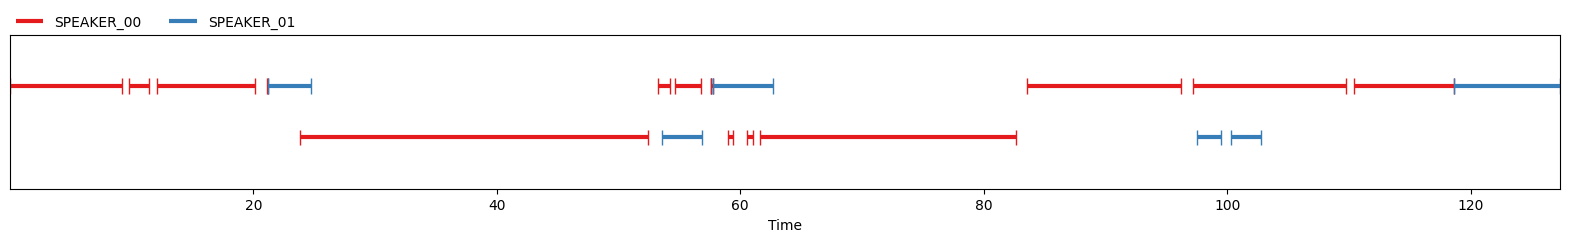

In [7]:
diarization

In [9]:
# dump the diarization output to disk using RTTM format
with open(outpath, "w") as rttm:
    diarization.write_rttm(rttm)